Percent of successful episodes: 0.484


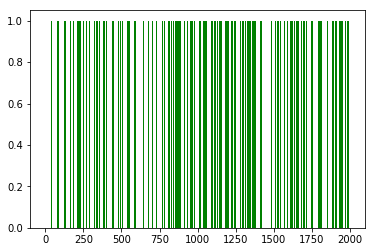

In [26]:
# 6-1 FrozenLake
import numpy as np
import gym
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

def one_hot(x):
    return np.identity(16)[x:x + 1]


env = gym.make('FrozenLake-v0')

# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n

learning_rate = 0.1

# Set Q-learning related parameters
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList = []

# These lines establish the feed-forward part of the network used to choose actions
X = tf.placeholder(shape=[1,input_size],dtype=tf.float32)  # state input
W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01))  # weight

Qpred = tf.matmul(X, W)  # Out Q prediction
Y = tf.placeholder(shape=[1, output_size],dtype=tf.float32)  # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init);
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        local_loss = []

        # The Q-Network training
        while not done:

            # Choose an action by greedily (with e chance of random action) from the Q-network
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            s1, reward, done, _ = env.step(a)
            if done:
                # Update Q, and no Qs+1, since it's a terminal state
                Qs[0, a] = reward
            else:
                # Obtain the Q_s1 values by feeding the new state through our network
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                # Update Q
                Qs[0, a] = reward + dis * np.max(Qs1)

            # Train our network using target (Y) and predicted Q (Qpred) values
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

            rAll += reward
            s = s1
        rList.append(rAll)

print("Percent of successful episodes: " + str(sum(rList)/num_episodes))
"""
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Qs)
"""
plt.bar(range(len(rList)), rList, color="Green")
plt.show()

In [16]:
# 6-2 CartPole
import numpy as np
import tensorflow as tf

import gym
env = gym.make('CartPole-v0')

# Constant defining our neural network
learning_rate = 1e-1
input_size = env.observation_space.shape[0]
output_size = env.action_space.n
X = tf.placeholder(tf.float32, [None, input_size], name="input_x")

# First layer of weight
W2 = tf.get_variable("W2", shape=[input_size, output_size], initializer=tf.contrib.layers.xavier_initializer())
Qpred = tf.matmul(X, W2)

# We need to define the parts of the network needed for learning a policy
Y = tf.placeholder(shape=[None, output_size],dtype=tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(Y - Qpred))
# Learning
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Values for q learning
num_episodes = 5000
dis = 0.9
rList = []

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(num_episodes):
    e = 1. / ((i / 10) + 1)
    step_count = 0
    s = env.reset()
    done = False
    
    # The Q-Network training
    while not done:
        step_count += 1
        x = np.reshape(s, [1, input_size])
        # Choose an action by greedily (with e chance of random action) from the Q-network
        Qs = sess.run(Qpred, feed_dict={X: x})
        if np.random.rand(1) < e:
            a = env.action_space.sample()
        else:
            a = np.argmax(Qs)
            
        # Get new state and reward from environment
        s1, reward, done, _ = env.step(a)
        if done:
            Qs[0, a] = -100
        else:
            x1 = np.reshape(s1, [1, input_size])
            # Obtain the Q' values by feeding the new state through our network
            Qs1 = sess.run(Qpred, feed_dict={X: x1})
            Qs[0, a] = reward = dis * np.max(Qs1)
            
        # Train our network using target and predicted Q values on each episode
        sess.run(train, feed_dict={X: x, Y: Qs})
        s = s1
            
    rList.append(step_count)
    print("Episode: {}  steps: {}".format(i, step_count))
    if len(rList) > 10 and np.mean(rList[-10:]) > 500:
            break
            
# See our trained network in action
observation = env.reset()
reward_sum = 0
while True:
    env.render()
    
    x = np.reshape(observation, [1, input_size])
    Qs = sess.run(Qpred, feed_dict={X: x})
    a = np.argmax(Qs)
    
    observation, reward, done, _ = env.step(a)
    reward_sum += reward
    if done:
        print("Total score: {}".format(reward_sum))
        break

Episode: 0  steps: 23
Episode: 1  steps: 13
Episode: 2  steps: 9
Episode: 3  steps: 28


Episode: 4  steps: 27
Episode: 5  steps: 12
Episode: 6  steps: 17
Episode: 7  steps: 15
Episode: 8  steps: 18


Episode: 9  steps: 34


Episode: 10  steps: 89


Episode: 11  steps: 65
Episode: 12  steps: 23
Episode: 13  steps: 25


Episode: 14  steps: 36
Episode: 15  steps: 32


Episode: 16  steps: 29
Episode: 17  steps: 16
Episode: 18  steps: 17


Episode: 19  steps: 51
Episode: 20  steps: 23
Episode: 21  steps: 12
Episode: 22  steps: 12
Episode: 23  steps: 10
Episode: 24  steps: 9
Episode: 25  steps: 9


Episode: 26  steps: 11
Episode: 27  steps: 10
Episode: 28  steps: 8
Episode: 29  steps: 9
Episode: 30  steps: 14
Episode: 31  steps: 46


Episode: 32  steps: 53
Episode: 33  steps: 25


Episode: 34  steps: 52
Episode: 35  steps: 51


Episode: 36  steps: 45
Episode: 37  steps: 24
Episode: 38  steps: 32
Episode: 39  steps: 14


Episode: 40  steps: 27


Episode: 41  steps: 34
Episode: 42  steps: 28


Episode: 43  steps: 43


Episode: 44  steps: 50
Episode: 45  steps: 45


Episode: 46  steps: 20
Episode: 47  steps: 32


Episode: 48  steps: 39
Episode: 49  steps: 22
Episode: 50  steps: 26


Episode: 51  steps: 53


Episode: 52  steps: 50
Episode: 53  steps: 18


Episode: 54  steps: 61


Episode: 55  steps: 49
Episode: 56  steps: 28


Episode: 57  steps: 21
Episode: 58  steps: 21


Episode: 59  steps: 40
Episode: 60  steps: 49


Episode: 61  steps: 38


Episode: 62  steps: 45
Episode: 63  steps: 62


Episode: 64  steps: 33
Episode: 65  steps: 46


Episode: 66  steps: 40
Episode: 67  steps: 39


Episode: 68  steps: 84


Episode: 69  steps: 147


Episode: 70  steps: 173
Episode: 71  steps: 10


Episode: 72  steps: 94
Episode: 73  steps: 41


Episode: 74  steps: 100
Episode: 75  steps: 70


Episode: 76  steps: 68


Episode: 77  steps: 156


Episode: 78  steps: 106


Episode: 79  steps: 63


Episode: 80  steps: 67


Episode: 81  steps: 135


Episode: 82  steps: 94
Episode: 83  steps: 45


Episode: 84  steps: 53


Episode: 85  steps: 100
Episode: 86  steps: 56


Episode: 87  steps: 55
Episode: 88  steps: 44
Episode: 89  steps: 26
Episode: 90  steps: 20
Episode: 91  steps: 10
Episode: 92  steps: 10
Episode: 93  steps: 22


Episode: 94  steps: 35
Episode: 95  steps: 21
Episode: 96  steps: 65


Episode: 97  steps: 33


Episode: 98  steps: 49
Episode: 99  steps: 54


Episode: 100  steps: 34


Episode: 101  steps: 31
Episode: 102  steps: 38


Episode: 103  steps: 93
Episode: 104  steps: 52


Episode: 105  steps: 39
Episode: 106  steps: 47


Episode: 107  steps: 44


Episode: 108  steps: 49
Episode: 109  steps: 55


Episode: 110  steps: 24
Episode: 111  steps: 21


Episode: 112  steps: 41
Episode: 113  steps: 26
Episode: 114  steps: 35


Episode: 115  steps: 26
Episode: 116  steps: 24


Episode: 117  steps: 56


Episode: 118  steps: 27
Episode: 119  steps: 22


Episode: 120  steps: 10
Episode: 121  steps: 13


Episode: 122  steps: 46
Episode: 123  steps: 24


Episode: 124  steps: 42


Episode: 125  steps: 35


Episode: 126  steps: 24
Episode: 127  steps: 19


Episode: 128  steps: 19
Episode: 129  steps: 24
Episode: 130  steps: 24


Episode: 131  steps: 43
Episode: 132  steps: 28


Episode: 133  steps: 88
Episode: 134  steps: 46


Episode: 135  steps: 108


Episode: 136  steps: 44


Episode: 137  steps: 75
Episode: 138  steps: 28
Episode: 139  steps: 20


Episode: 140  steps: 33
Episode: 141  steps: 55


Episode: 142  steps: 24
Episode: 143  steps: 34


Episode: 144  steps: 39
Episode: 145  steps: 23


Episode: 146  steps: 32


Episode: 147  steps: 75
Episode: 148  steps: 24


Episode: 149  steps: 47
Episode: 150  steps: 31


Episode: 151  steps: 41
Episode: 152  steps: 53


Episode: 153  steps: 41
Episode: 154  steps: 47


Episode: 155  steps: 60
Episode: 156  steps: 31


Episode: 157  steps: 21


Episode: 158  steps: 33
Episode: 159  steps: 18
Episode: 160  steps: 23


Episode: 161  steps: 30
Episode: 162  steps: 31
Episode: 163  steps: 23


Episode: 164  steps: 17
Episode: 165  steps: 26


Episode: 166  steps: 40
Episode: 167  steps: 32


Episode: 168  steps: 26
Episode: 169  steps: 17
Episode: 170  steps: 16


Episode: 171  steps: 46


Episode: 172  steps: 89
Episode: 173  steps: 76


Episode: 174  steps: 27
Episode: 175  steps: 38
Episode: 176  steps: 41


Episode: 177  steps: 22
Episode: 178  steps: 29
Episode: 179  steps: 19
Episode: 180  steps: 36


Episode: 181  steps: 26
Episode: 182  steps: 37
Episode: 183  steps: 43
Episode: 184  steps: 43


Episode: 185  steps: 51
Episode: 186  steps: 68
Episode: 187  steps: 26


Episode: 188  steps: 43
Episode: 189  steps: 49


Episode: 190  steps: 37
Episode: 191  steps: 44
Episode: 192  steps: 38


Episode: 193  steps: 17
Episode: 194  steps: 11
Episode: 195  steps: 18
Episode: 196  steps: 26
Episode: 197  steps: 21


Episode: 198  steps: 14
Episode: 199  steps: 33
Episode: 200  steps: 33
Episode: 201  steps: 35


Episode: 202  steps: 33
Episode: 203  steps: 27
Episode: 204  steps: 26
Episode: 205  steps: 23
Episode: 206  steps: 23


Episode: 207  steps: 36
Episode: 208  steps: 46


KeyboardInterrupt: 

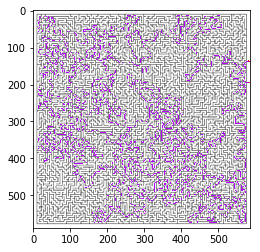

In [25]:
# bonus (solution for maze in video 'lab 6-2')
import matplotlib.image as mpimg
img = mpimg.imread('D:\\maze.png')
plt.imshow(img)
plt.show()